# CITRA DATA

### Path Data

In [5]:
import os
import cv2
import numpy as np
import pandas as pd
import random
from skimage.feature import local_binary_pattern

# Path dataset
dataset_path = "D:\\Belajar Machine Learning\\famscreen_ml\\data_mentah"

# FUNGSI PROGRAM

### Load Haar Cascade

In [6]:
# Load Haar Cascade classifier untuk deteksi wajah
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

### Fungsi Klasifikasi Kelompok Umur , Ekstraksi Fitur, dan Augmentasi Gambar

In [7]:
# Fungsi untuk mengonversi umur menjadi kategori umur
def categorize_age(age):
       if 1 <= age <= 10:
              return 0  # Anak-anak
       elif 11 <= age <= 18:
              return 1  # Remaja
       elif 19 <= age <= 59:
              return 2  # Dewasa
       return -1  # Label tidak valid

# Fungsi untuk ekstraksi fitur LBP
def extract_lbp_features(image, radius=2, n_points=16) :
    # Hitung LBP pada gambar
    lbp = local_binary_pattern(image, n_points, radius, method="uniform")
    
    # Hitung histogram dari LBP
    lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    
    # Normalisasi histogram
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-6)  # Normalisasi agar jumlah histogram = 1
    return lbp_hist

# DATA PROCESSING & EKSTRAKSI FITUR

### Read Gambar dan Menyimpannya di List

In [8]:
# Inisialisasi list untuk menyimpan data
data = []

# Mendapatkan daftar file gambar dalam folder dataset
image_files = [f for f in os.listdir(dataset_path) if f.endswith((".jpg", ".png"))]
image_data_by_age = {}

# Mengelompokkan gambar berdasarkan kategori umur
for image_file in image_files:
    parts = image_file.split('_')
    age = int(parts[0])  # Mengambil usia dari nama file
    age_category = categorize_age(age)
    
    if age_category != -1:
        if age_category not in image_data_by_age:
            image_data_by_age[age_category] = []
        image_data_by_age[age_category].append(image_file)

# Proses gambar yang ada untuk ekstraksi fitur
for age_category, files in image_data_by_age.items():
    for image_file in files:
        image_path = os.path.join(dataset_path, image_file)
        
        # Baca gambar dan konversi ke grayscale
        image = cv2.imread(image_path)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Ubah ke grayscale untuk LBP
        
        # Deteksi wajah
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Jika wajah terdeteksi, crop wajah dan simpan
        if len(faces) > 0:
            for (x, y, w, h) in faces:
                # Crop wajah
                face_image = gray_image[y:y+h, x:x+w]
                face_image = cv2.resize(face_image, (256, 256))  # Resize wajah agar konsisten
                
                # Ekstraksi fitur LBP
                lbp_features = extract_lbp_features(face_image)
                
                # Menggabungkan label umur dan fitur LBP ke dalam list data
                data.append([age_category] + lbp_features.tolist())

### Menyimpan Data Gambar ke File CSV

In [9]:
# Konversi ke DataFrame Pandas dan simpan ke CSV
df = pd.DataFrame(data, columns=['age_category'] + [f'pixel_{i}' for i in range(len(lbp_features))])
df.to_csv("df_sampled.csv", index=False)

# DATA CLEANING

### Read Data CSV

In [10]:
# Membaca data dari CSV
df = pd.read_csv("df_sampled.csv")
print(df.head())

   age_category   pixel_0   pixel_1   pixel_2   pixel_3   pixel_4   pixel_5  \
0             0  0.011703  0.010208  0.016556  0.018372  0.020447  0.033417   
1             0  0.025497  0.016800  0.021439  0.025787  0.026352  0.038315   
2             0  0.058823  0.032425  0.032578  0.028961  0.025787  0.030640   
3             0  0.043182  0.029388  0.028809  0.025558  0.022079  0.028656   
4             0  0.041107  0.031036  0.020905  0.018402  0.018890  0.026505   

    pixel_6   pixel_7   pixel_8   pixel_9  pixel_10  pixel_11  pixel_12  \
0  0.053238  0.127090  0.241669  0.175507  0.069870  0.048264  0.026642   
1  0.059540  0.109131  0.163406  0.121979  0.063080  0.047058  0.032867   
2  0.040039  0.063568  0.084839  0.067886  0.041885  0.033432  0.026474   
3  0.041809  0.084183  0.141876  0.095230  0.047150  0.032532  0.026489   
4  0.037979  0.062027  0.084000  0.075775  0.042526  0.036011  0.021805   

   pixel_13  pixel_14  pixel_15  pixel_16  pixel_17  
0  0.022797  0.01597

### Cek Informasi Data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age_category  335 non-null    int64  
 1   pixel_0       335 non-null    float64
 2   pixel_1       335 non-null    float64
 3   pixel_2       335 non-null    float64
 4   pixel_3       335 non-null    float64
 5   pixel_4       335 non-null    float64
 6   pixel_5       335 non-null    float64
 7   pixel_6       335 non-null    float64
 8   pixel_7       335 non-null    float64
 9   pixel_8       335 non-null    float64
 10  pixel_9       335 non-null    float64
 11  pixel_10      335 non-null    float64
 12  pixel_11      335 non-null    float64
 13  pixel_12      335 non-null    float64
 14  pixel_13      335 non-null    float64
 15  pixel_14      335 non-null    float64
 16  pixel_15      335 non-null    float64
 17  pixel_16      335 non-null    float64
 18  pixel_17      335 non-null    

#### Analisis Statistik Deskriptif

In [12]:
# Menampilkan statistik deskriptif dari dataset
df.describe(include="all")

,age_category,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17
count,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000
mean,0.979104,0.021845,0.015682,0.017012,0.019596,0.020367,0.031804,0.050350,0.113029,0.186389,0.144180,0.063116,0.047499,0.026828,0.024369,0.021423,0.016294,0.052960,0.127257
std,0.809476,0.016346,0.010198,0.007351,0.006054,0.005557,0.005828,0.008829,0.027439,0.063646,0.044925,0.013837,0.011854,0.004939,0.005002,0.006875,0.009086,0.027034,0.084015
min,0.000000,0.000137,0.000351,0.000641,0.001556,0.002472,0.012238,0.014343,0.022903,0.034485,0.029037,0.018600,0.014801,0.009705,0.009247,0.006866,0.004166,0.012848,0.010056
25%,0.000000,0.009941,0.008423,0.011665,0.015778,0.017410,0.028694,0.045372,0.094864,0.140381,0.108109,0.054550,0.039764,0.024002,0.020836,0.015732,0.009598,0.034393,0.067619
50%,1.000000,0.016388,0.012024,0.015854,0.019394,0.020462,0.032364,0.052063,0.120544,0.191833,0.153366,0.064087,0.047333,0.027069,0.024323,0.020218,0.012756,0.045822,0.095779
75%,2.000000,0.032532,0.023361,0.022369,0.023857,0.024338,0.035728,0.056656,0.133865,0.229790,0.176712,0.071495,0.053780,0.030197,0.027710,0.026749,0.022568,0.063210,0.180481
max,2.000000,0.083649,0.059418,0.034576,0.033157,0.035873,0.046753,0.066666,0.162460,0.367996,0.257141,0.117645,0.095993,0.042130,0.038086,0.036133,0.055740,0.177582,0.479340


In [13]:
# Memeriksa jumlah nilai yang hilang di setiap kolom
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

#### Cek Data Duplikat

In [14]:
# Menghapus baris duplikat
df = df.drop_duplicates()

# Memeriksa apakah ada duplikat
print(f"Jumlah data setelah menghapus duplikat: {df.shape[0]}")

Jumlah data setelah menghapus duplikat: 335


#### Memeriksa Konsistensi Kategori Usia

In [15]:
# Memeriksa distribusi kategori usia
print(df['age_category'].value_counts())

age_category
1    116
0    113
2    106
Name: count, dtype: int64


# DATA SPLITTING

In [61]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan target
X = df.drop(columns=['age_category'])
y = df['age_category']

# Menggunakan SMOTE untuk menyeimbangkan kategori
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data yang telah diseimbangkan
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)

# PELATIHAN MODEL (RANDOM FOREST)

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Inisialisasi model Random Forest dengan parameter awal
model = RandomForestClassifier(n_estimators=120, random_state=42, class_weight='balanced')

# Melatih model
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Model Random Forest:", accuracy * 100, "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi Model Random Forest: 62.857142857142854 %

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.89      0.50      0.64        16
           2       0.50      0.88      0.64         8

    accuracy                           0.63        35
   macro avg       0.66      0.67      0.63        35
weighted avg       0.70      0.63      0.63        35



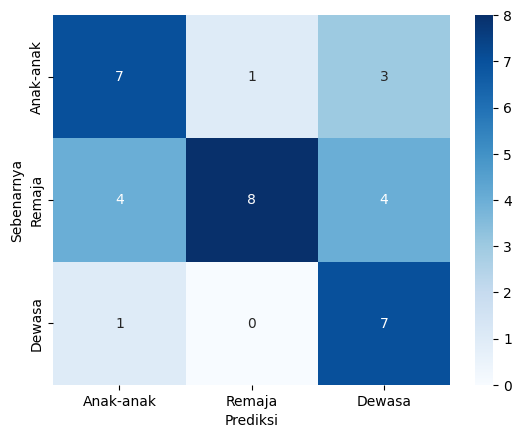

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Anak-anak', 'Remaja', 'Dewasa'], yticklabels=['Anak-anak', 'Remaja', 'Dewasa'])
plt.xlabel('Prediksi')
plt.ylabel('Sebenarnya')
plt.show()

In [41]:
import joblib

# Menyimpan model
joblib.dump(model, "famscreen_model.pkl")

['famscreen_model.pkl']

In [42]:
# Memuat model Random Forest yang telah disimpan
model = joblib.load('famscreen_model.pkl')
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# PENGUJIAN MENGGUNAKAN INPUTAN GAMBAR DARI APLIKASI

d:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


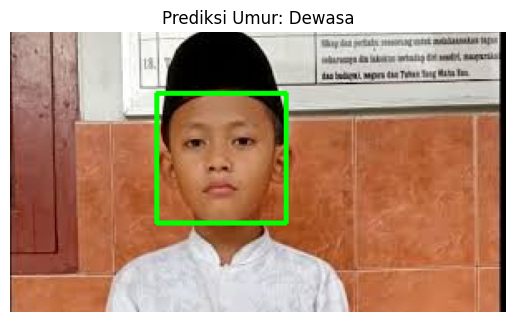

Kategori Umur Prediksi: Dewasa


In [46]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Fungsi untuk mengubah angka prediksi menjadi kategori usia (label teks)
def age_category_to_label(age_category):
    if age_category == 0:
        return "Anak-anak"
    elif age_category == 1:
        return "Remaja"
    elif age_category == 2:
        return "Dewasa"
    return "Tidak Valid"

# Fungsi untuk mendeteksi wajah dan ekstraksi fitur LBP dari gambar baru
def detect_and_predict(image_path, model, face_cascade, radius=2, n_points=16):
    # Membaca gambar dan konversi ke grayscale
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Deteksi wajah dalam gambar
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Jika wajah terdeteksi
    if len(faces) > 0:
        for (x, y, w, h) in faces:
            # Crop wajah
            face_image = gray_image[y:y+h, x:x+w]
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            face_image_resized = cv2.resize(face_image, (256, 256))

            # Ekstraksi fitur LBP dari wajah yang sudah diaugmentasi
            lbp_features = extract_lbp_features(face_image_resized, radius=radius, n_points=n_points)

            # Prediksi menggunakan model Random Forest
            prediction = model.predict([lbp_features])  # Model menerima array 2D, jadi fitur LBP harus dalam list
            predicted_age_category = prediction[0]
            
            # Mengonversi angka prediksi menjadi kategori usia (label teks)
            predicted_age_label = age_category_to_label(predicted_age_category)

            # Visualisasi hasil
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title(f'Prediksi Umur: {predicted_age_label}')
            plt.axis('off')
            plt.show()

            return predicted_age_category, predicted_age_label
    else:
        print("Tidak ada wajah yang terdeteksi dalam gambar.")
        return None, None

# Contoh penggunaan deteksi dengan inputan gambar baru
image_path = "D:\\Belajar Machine Learning\\famscreen_ml\\images\\imageFile_anak.jpg"  
detected_age_category, predicted_age_label = detect_and_predict(image_path, model, face_cascade)

if detected_age_category is not None:
    print(f"Kategori Umur Prediksi: {predicted_age_label}")